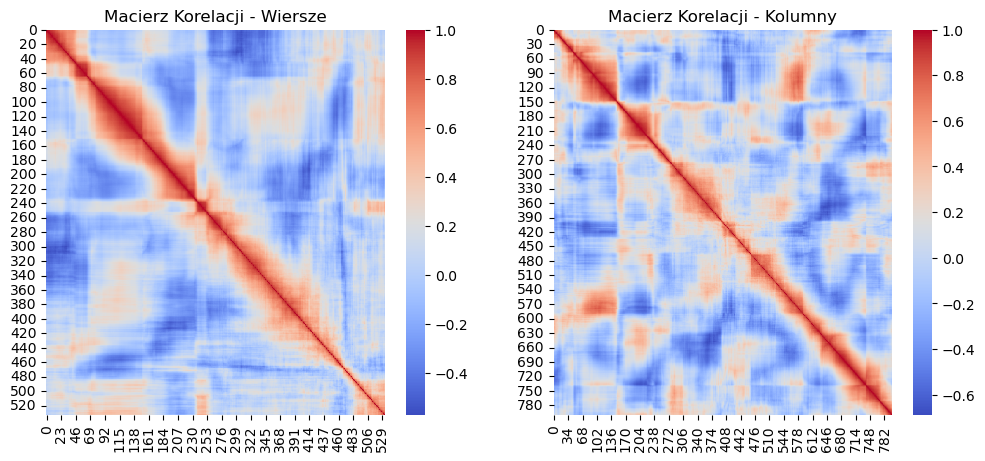

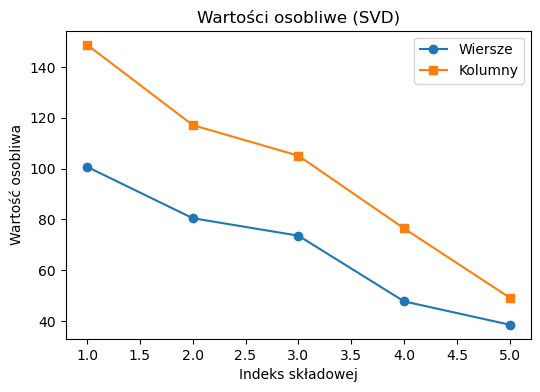

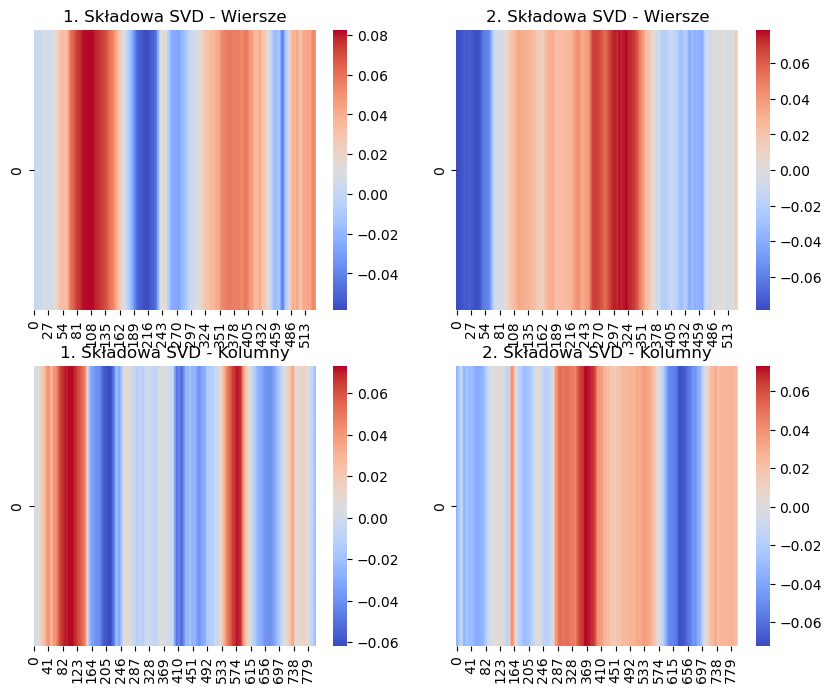

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from skimage import io

# Załaduj obraz i znormalizuj
image_url = "6.webp"
image = io.imread(image_url, as_gray=True)
image = image / np.max(image)  # Normalizacja do zakresu [0,1]

# Macierze korelacji
corr_matrix_rows = np.corrcoef(image)
corr_matrix_cols = np.corrcoef(image.T)

# Rozkład SVD
svd_rows = TruncatedSVD(n_components=5)
svd_cols = TruncatedSVD(n_components=5)
svd_rows.fit(corr_matrix_rows)
svd_cols.fit(corr_matrix_cols)

# Wizualizacja macierzy korelacji
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(corr_matrix_rows, ax=ax[0], cmap="coolwarm", cbar=True)
ax[0].set_title("Macierz Korelacji - Wiersze")
sns.heatmap(corr_matrix_cols, ax=ax[1], cmap="coolwarm", cbar=True)
ax[1].set_title("Macierz Korelacji - Kolumny")
plt.show()

# Wizualizacja wartości osobliwych
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), svd_rows.singular_values_, marker='o', label="Wiersze")
plt.plot(range(1, 6), svd_cols.singular_values_, marker='s', label="Kolumny")
plt.xlabel("Indeks składowej")
plt.ylabel("Wartość osobliwa")
plt.legend()
plt.title("Wartości osobliwe (SVD)")
plt.show()

# Wizualizacja pierwszych dwóch składowych
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.heatmap(svd_rows.components_[0].reshape(1, -1), ax=ax[0, 0], cmap="coolwarm", cbar=True)
ax[0, 0].set_title("1. Składowa SVD - Wiersze")
sns.heatmap(svd_rows.components_[1].reshape(1, -1), ax=ax[0, 1], cmap="coolwarm", cbar=True)
ax[0, 1].set_title("2. Składowa SVD - Wiersze")
sns.heatmap(svd_cols.components_[0].reshape(1, -1), ax=ax[1, 0], cmap="coolwarm", cbar=True)
ax[1, 0].set_title("1. Składowa SVD - Kolumny")
sns.heatmap(svd_cols.components_[1].reshape(1, -1), ax=ax[1, 1], cmap="coolwarm", cbar=True)
ax[1, 1].set_title("2. Składowa SVD - Kolumny")
plt.show()
